FONTE: https://www.kaggle.com/zalando-research/fashionmnist

### Dataset
Fashion-MNIST é um conjunto de dados das imagens dos artigos de Zalando - consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de testes de 10.000 exemplos. Cada exemplo é uma imagem em escala de cinza de 28 x 28, associada a um rótulo de 10 classes. Zalando pretende que o Fashion-MNIST sirva como substituto direto do conjunto de dados MNIST original para algoritmos de aprendizado de máquina de benchmarking. Ele compartilha o mesmo tamanho de imagem e estrutura de divisões de treinamento e teste.

O conjunto de dados MNIST original contém muitos dígitos manuscritos. Os membros da comunidade de AI / ML / Ciência de dados amam esse conjunto de dados e o usam como referência para validar seus algoritmos. De fato, o MNIST é frequentemente o primeiro grupo de dados que os pesquisadores tentam. "Se não funcionar no MNIST, não funcionará", disseram eles. "Bem, se funcionar no MNIST, ainda poderá falhar nos outros."

Zalando procura substituir o conjunto de dados MNIST original

### Conteúdo
Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels no total. Cada pixel tem um único valor de pixel associado, indicando a claridade ou a escuridão desse pixel, com números mais altos significando mais escuros. Esse valor de pixel é um número inteiro entre 0 e 255. Os conjuntos de dados de treinamento e teste possuem 785 colunas. A primeira coluna consiste nos rótulos das classes (veja acima) e representa o artigo de vestuário. O restante das colunas contém os valores de pixel da imagem associada.

Para localizar um pixel na imagem, suponha que decompusemos x como x = i * 28 + j, onde i e j são números inteiros entre 0 e 27. O pixel está localizado na linha i e na coluna j de uma matriz 28 x 28 .
Por exemplo, pixel31 indica o pixel que está na quarta coluna da esquerda e a segunda linha da parte superior, como no diagrama ascii abaixo.

Cada exemplo de treinamento e teste é atribuído a um dos seguintes rótulos:

0 Camiseta / top

1 calça

2 Pulôver

3 Vestido

4 Casaco

5 Sandália

6 Camisa

7 Sapatilha

8 Bag

9 Bota no tornozelo

TL; DR

Cada linha é uma imagem separada.
A coluna 1 é o rótulo da classe.
As colunas restantes são números de pixels (784 no total).
Cada valor é a "escuridão" do pixel (1 a 255)

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('fashionmnist/fashion-mnist_train.csv')

In [5]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

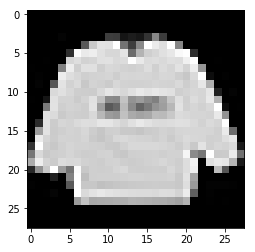

In [7]:
# Imprimindo um objeto do dataset
plt.imshow(data.values[0][1:].reshape(28,28), cmap='gray', interpolation='none')
plt.show()

### A atividade consiste em utilizar o KNN para classificar as imagens do fmnist

In [8]:
(dadosTreino, dadosTeste, yTreino, yTeste) = train_test_split(data,
                                                              data.label, test_size=0.25, random_state=42)

In [9]:
(dadosTreino, dadosValidacao, yTreino, yValidacao) = train_test_split(dadosTreino, yTreino,
test_size=0.1, random_state=84)

In [10]:
print("training data points: {}".format(len(yTreino)))
print("testing data points: {}".format(len(yTeste)))

training data points: 40500
testing data points: 15000


In [14]:
kVals = range(1, 10, 2)
accuracies = []

In [16]:
for k in kVals:
        model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        model.fit(dadosTreino, yTreino)
        score = model.score(dadosValidacao, yValidacao)
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)

k=1, accuracy=84.69%
k=3, accuracy=85.47%
k=5, accuracy=85.69%
k=7, accuracy=85.87%
k=9, accuracy=85.33%


In [12]:
model = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
model.fit(dadosTreino, yTreino)
y_predito = model.predict(dadosTeste)
score = model.score(dadosValidacao, yValidacao)

0.8586666666666667
[[1325    0   29   30    8    0  119    0    8    0]
 [   7 1415    9   37    0    0   11    0    0    0]
 [  16    2 1206   14  135    0  119    0    2    0]
 [  78    9   13 1333   66    0   41    0    1    0]
 [  12    2  162   54 1129    0  123    0    1    0]
 [   4    0    0    0    0 1176   10  149    3   93]
 [ 307    0  219   20  122    0  883    0    9    1]
 [   0    0    0    0    0    5    1 1475    0   60]
 [   6    0   17    6   11    0   17    8 1380    2]
 [   0    0    1    0    0    1    0   40    0 1458]]
0.852
0.852
0.8524952998799401
0.8510698935243457
0.852
0.8564154718946779
0.8546013138001693
0.852
0.8530601422173503
0.852


In [13]:
print("Utilizando a distância métrica euclidiana.")
print("Este é o valor do score: " + str(score) + ".")

print("Esta é a matriz de confusão: ")
print(confusion_matrix(yTeste, y_predito))

print("Este é o valor da acurácia: " + str(accuracy_score(yTeste, y_predito, normalize=True)) + ".")

print("Este é o valor do f1 score utilizando o average micro: " + str(f1_score(yTeste, y_predito, average='micro')) + ".")

print("Este é o valor do f1 score utilizando o average macro: " + str(f1_score(yTeste, y_predito, average='macro')) + ".")

print("Este é o valor do f1 score utilizando o average weighted: " + str(f1_score(yTeste, y_predito, average='weighted')) + ".")

print("Este é o valor da precisao utilizando o average micro: " + str(precision_score(yTeste, y_predito, average='micro')) + ".")

print("Este é o valor da precisao utilizando o average macro: " + str(precision_score(yTeste, y_predito, average='macro')) + ".")

print("Este é o valor da precisao utilizando o average weighted: " + str(precision_score(yTeste, y_predito, average='weighted')) + ".")

print("Este é o valor do recall utilizando o average micro: " + str(recall_score(yTeste, y_predito, average='micro')) + ".")

print("Este é o valor do recall utilizando o average macro: " + str(recall_score(yTeste, y_predito, average='macro')) + ".")

print("Este é o valor do recall utilizando o average weighted: " + str(recall_score(yTeste, y_predito, average='weighted')) + ".")

Utilizando a distância métrica euclidiana.
Este é o valor do score: 0.8586666666666667.
Esta é a matriz de confusão: 
[[1325    0   29   30    8    0  119    0    8    0]
 [   7 1415    9   37    0    0   11    0    0    0]
 [  16    2 1206   14  135    0  119    0    2    0]
 [  78    9   13 1333   66    0   41    0    1    0]
 [  12    2  162   54 1129    0  123    0    1    0]
 [   4    0    0    0    0 1176   10  149    3   93]
 [ 307    0  219   20  122    0  883    0    9    1]
 [   0    0    0    0    0    5    1 1475    0   60]
 [   6    0   17    6   11    0   17    8 1380    2]
 [   0    0    1    0    0    1    0   40    0 1458]]
Este é o valor da acurácia: 0.852.
Este é o valor do f1 score utilizando o average micro: 0.852.
Este é o valor do f1 score utilizando o average macro: 0.8524952998799401.
Este é o valor do f1 score utilizando o average weighted: 0.8510698935243457.
Este é o valor da precisao utilizando o average micro: 0.852.
Este é o valor da precisao utilizando o